In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
iris = sns.load_dataset("iris")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
12,4.8,3.0,1.4,0.1,setosa
97,6.2,2.9,4.3,1.3,versicolor
131,7.9,3.8,6.4,2.0,virginica
110,6.5,3.2,5.1,2.0,virginica


In [8]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [11]:
iris.shape

(150, 5)

In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
iris["species"] = LabelEncoder.fit_transform(iris,iris["species"])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:111: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.classes_, y = _unique(y, return_inverse=True)


In [14]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X = iris.drop(["species"],axis=1)
y = iris["species"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


In [17]:
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

1.0
0.9666666666666667


In [20]:
print(classification_report(y_train,pred_train))
print("-----------------------------------------------------------------------------")
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [39, 41, 40]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 81\nvalue = [0, 41, 40]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.198\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[0] <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x

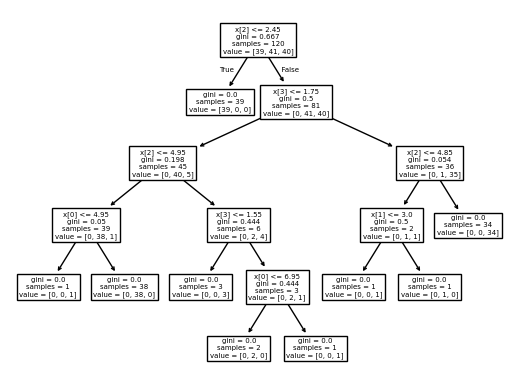

In [23]:
from sklearn import tree
tree.plot_tree(model)

[Text(0.5, 0.9166666666666666, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [39, 41, 40]\nclass = versicolor'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'petal_width <= 1.75\ngini = 0.5\nsamples = 81\nvalue = [0, 41, 40]\nclass = versicolor'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal_length <= 4.95\ngini = 0.198\nsamples = 45\nvalue = [0, 40, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'sepal_length <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal_widt

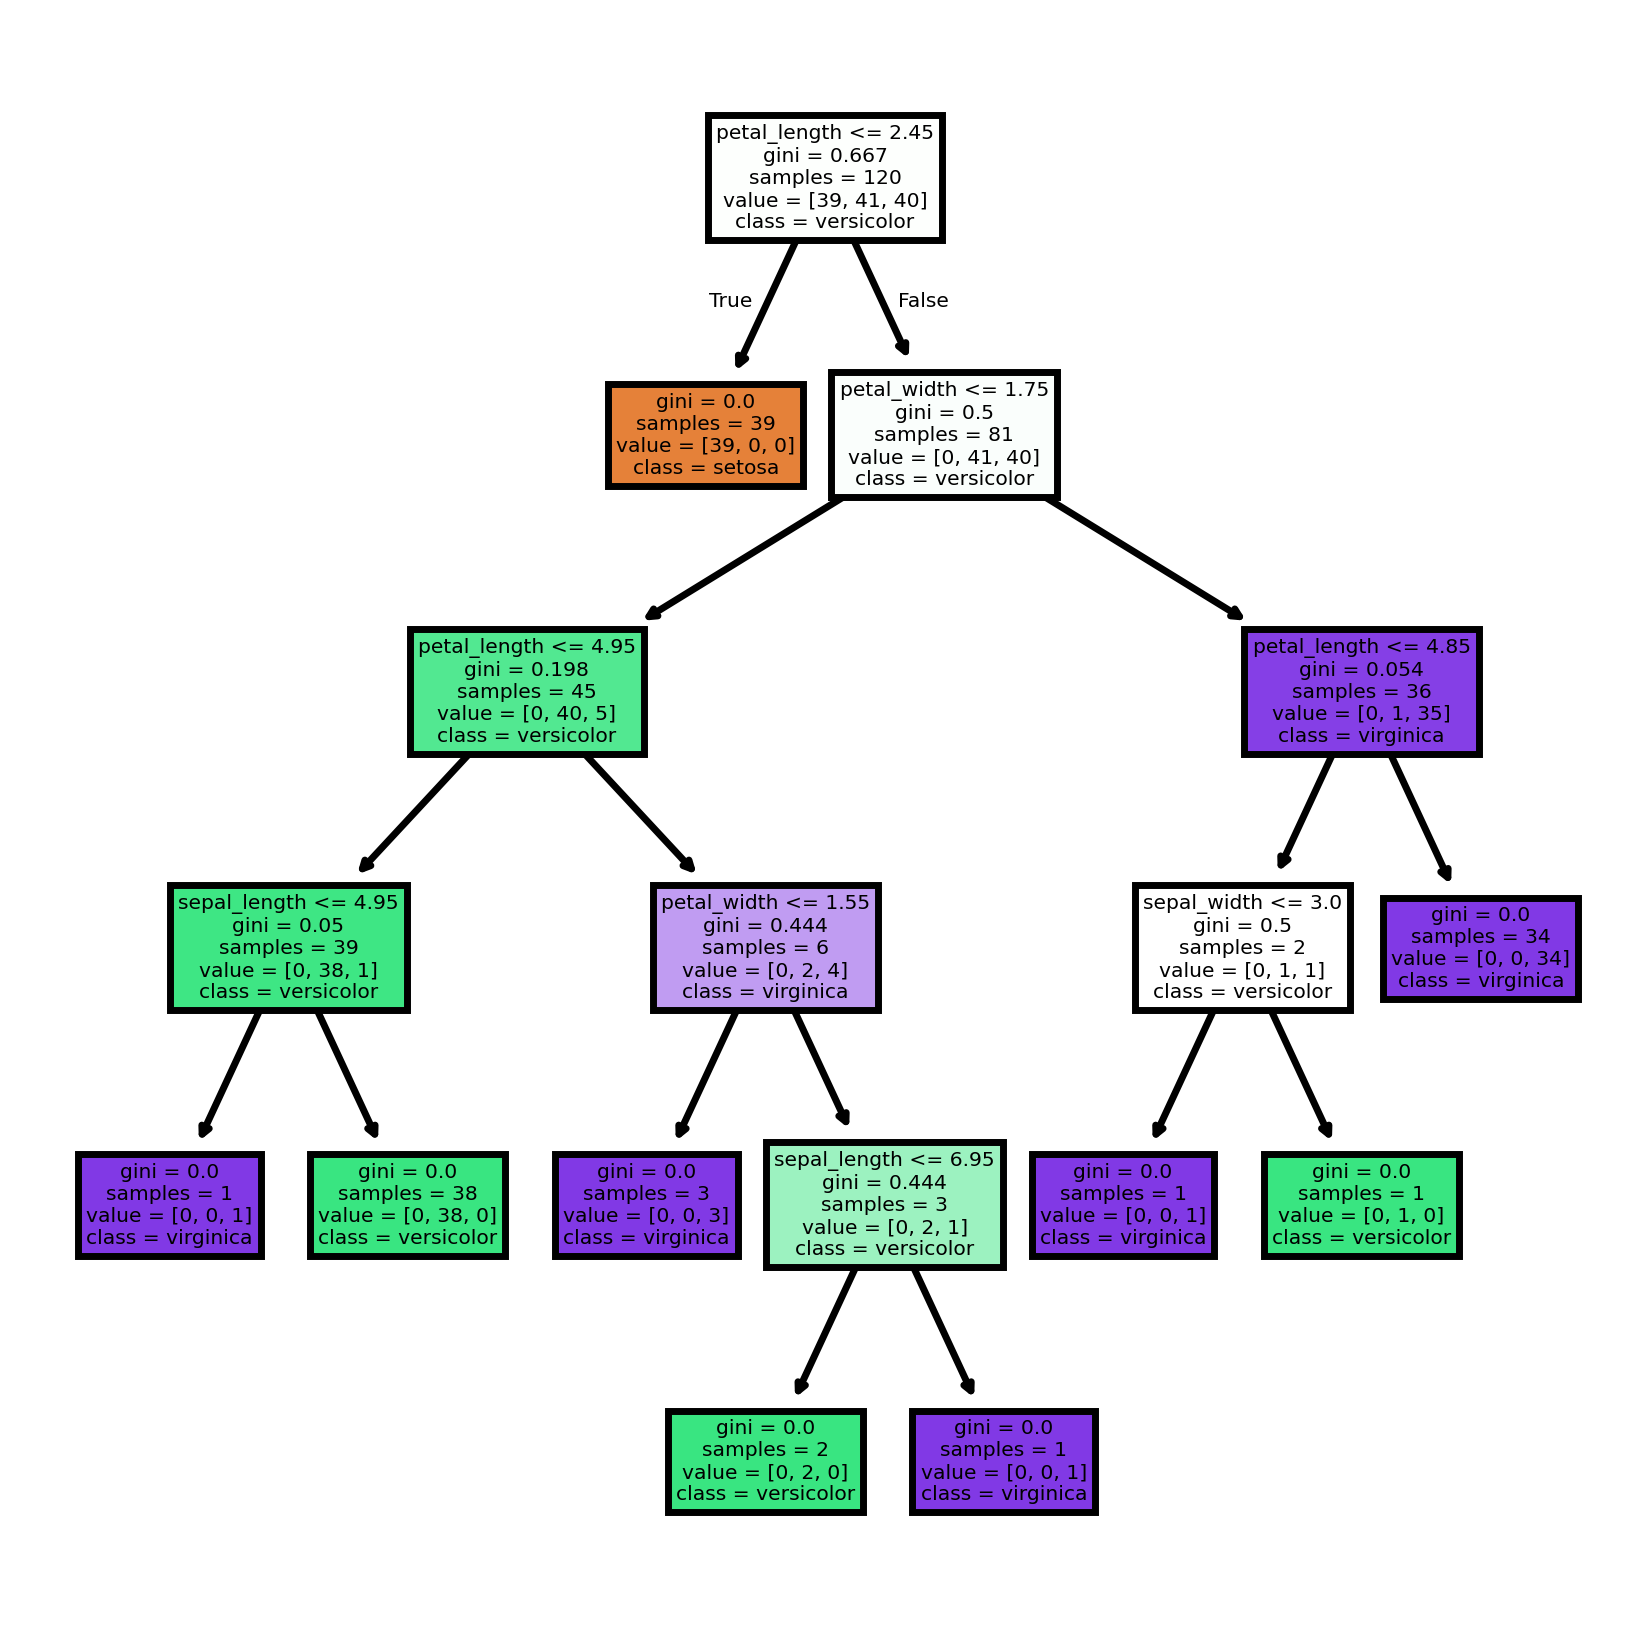

In [24]:
fn = ['sepal_length','sepal_width','petal_length','petal_width']
cn = ['setosa','versicolor','virginica']

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True)

In [2]:
df = pd.read_csv("bankruptcy-prevention.csv",sep=";")

In [3]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [5]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [6]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [7]:
df.shape

(250, 7)

In [8]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [10]:
df.isna().sum()

,0
industrial_risk,0
management_risk,0
financial_flexibility,0
credibility,0
competitiveness,0
operating_risk,0
class,0


In [11]:
df[" class"].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [12]:
df[" class"].value_counts()

,count
class,
non-bankruptcy,143
bankruptcy,107


In [13]:
df.dtypes

,0
industrial_risk,float64
management_risk,float64
financial_flexibility,float64
credibility,float64
competitiveness,float64
operating_risk,float64
class,object


In [14]:
df.columns = ['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class']

In [15]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [16]:
df["class"] = LabelEncoder.fit_transform(df,df["class"])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:111: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.classes_, y = _unique(y, return_inverse=True)


In [17]:
df["class"].unique()

array([0, 1])

<Axes: xlabel='class'>

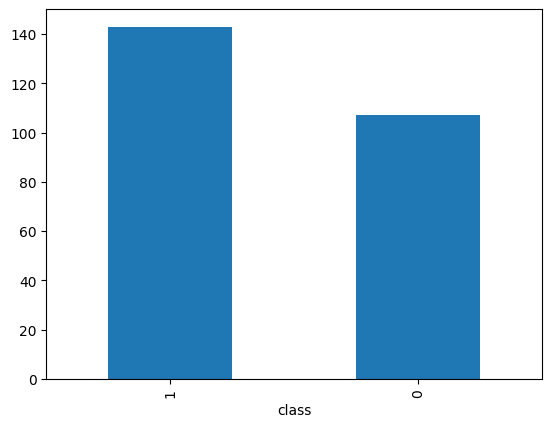

In [18]:
df["class"].value_counts().plot(kind="bar")

In [19]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

X = df.drop(["class"],axis=1)
y = df["class"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)


In [24]:
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

1.0
1.0


In [28]:
print(classification_report(y_train,pred_train))
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       116

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        27

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [25]:
bg = BaggingClassifier(n_estimators=10)
bg.fit(X_train,y_train)

BaggingClassifier()

In [26]:
pred_train_1 = bg.predict(X_train)
pred_test_1 = bg.predict(X_test)

In [27]:
print(accuracy_score(y_train,pred_train_1))
print(accuracy_score(y_test,pred_test_1))

1.0
1.0


In [29]:
print(classification_report(y_train,pred_train_1))
print(classification_report(y_test,pred_test_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       116

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        27

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [31]:
## cv method for DT,BG,RF

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cv:

data-> data1,data2,data3,data4,data5

m1 --> data1,data2,data3,data4 ::: test --> data5
m2 --> data1,data2,data3,data5 ::: test --> data4
m3 --> data1,data2,data4,data5 ::: test --> data3
m4 --> data1,data3,data4,data5 ::: test --> data2
m5 --> data2,data3,data4,data5 ::: test --> data1



In [40]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename,names = names)

dataframe.head()

array = dataframe.values
X = array[:,0:8]
y = array[:,8]

kfold = KFold(n_splits=5)
model = DecisionTreeClassifier(criterion='gini',)
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.7006535947712418


In [ ]:
## bagging classifier

In [47]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename,names = names)

dataframe.head()

array = dataframe.values
X = array[:,0:8]
y = array[:,8]

kfold = KFold(n_splits=5)
num_trees = 100
cart = DecisionTreeClassifier()
model = BaggingClassifier(n_estimators=num_trees)
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.7630846277905101


In [48]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename,names = names)

dataframe.head()

array = dataframe.values
X = array[:,0:8]
y = array[:,8]

kfold = KFold(n_splits=10)
num_trees = 100
model = RandomForestClassifier(n_estimators=num_trees)
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.7656015037593984


In [49]:
## cross validation avoids the overfitting

## your task is find out whether cross validation or train_test_split method works better?
## comapre between them.

In [51]:
# stacking ensemble --> combining all the different models



import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename,names = names)

dataframe.head()

array = dataframe.values
X = array[:,0:8]
y = array[:,8]


estimators = []

model1 = LogisticRegression()
estimators.append(("logistic",model1))

model2 = BaggingClassifier()
estimators.append(("bagging",model2))

model3 = DecisionTreeClassifier()
estimators.append(("Decisiontree",model3))

model4 = RandomForestClassifier()
estimators.append(("RandomForest",model4))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble,X,y,cv=kfold)

results.mean()

np.float64(0.7564251537935749)